# **2021-CT5133 Deep Learning**

**Priya Singh**:- 20230848

**Sonal Singh**:- 20230693

# **Introduction to Logistic Regression**

Logistic Regression is an extension of linear regression model applicable to classification problems. It solves classification problems by providing two possible outcomes in the form of 0 and 1.  Sigmoid function is used for converting predictions into probabilities. To create accurate model with minimum error, cost function will be used. Minimization of cost value will be performed with the implementation of Gradient Descent.



References:

https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148


Followed class notes

# **Part 1: Implement Logistic Regression**


Functions Required  -

*   Sigmoid Function
*   Function to perform forward propagation using Sigmoid function
*   Cost function
*   Function to optimize values of weight and bias
*   Function to calculate accuracy





**Sigmoid Function**

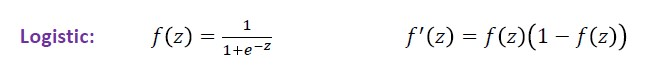

In [ ]:
def sigmoid(z):
  '''Function to calculate Sigmoid function'''
  a = 1 / (1 + np.exp(-z))      
  return a

**Function to perform forward propagation using Sigmoid function**

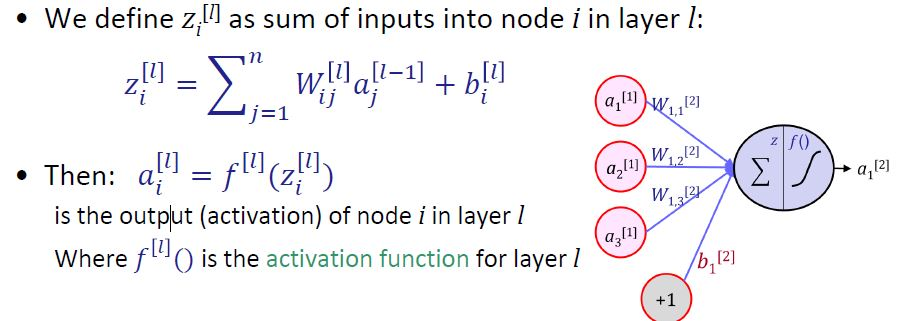

In [ ]:
def forward_prop(X, w, b):
  '''Function to perform forward propagation using Sigmoid function'''
  # Calculate z - Sum of inputs into node
  z = X.dot(w) + b
  
  # Calculate a - output (activation) of node
  # Considering Sigmoid function
  a = sigmoid(z)
  return a

**Cost function**

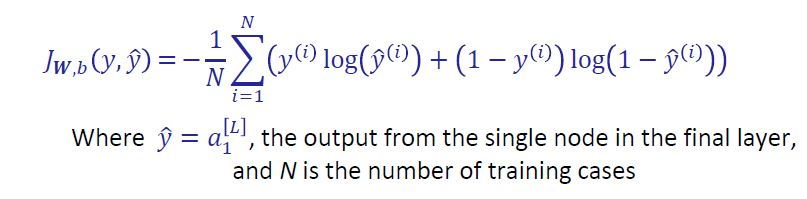

In [ ]:
def cost_function(y, y_pred):
  '''Average log loss cost function'''
  # Loss function
  loss = -(1/y.shape[0])*(np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))
  
  return loss

**Function to optimize values of weight and bias**

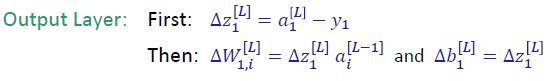

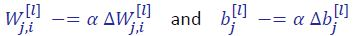

In [ ]:
def optimizer(W, b, X, y, y_pred, lr):
  '''Gradient descent Function to optimize values of weight and bias'''
  # Δ𝑧1[𝐿]=𝑎1𝐿−𝑦1
  # Δ𝑊1,𝑖[𝐿]=Δ𝑧1[𝐿]𝑎𝑖[𝐿−1]
  dz = y_pred - y
  dW = X.T.dot(dz) / y.shape[0]

  # Δ𝑏1[𝐿]=Δ𝑧1𝐿
  db = np.mean(dz, axis=0, keepdims=True)
  #db = dz
  
  # Update weight as 𝑊𝑗,𝑖[𝑙] −= 𝛼Δ𝑊𝑗,𝑖[𝑙]
  W -= lr * dW
  # Upate bias as 𝑏𝑗[𝑙] −= 𝛼Δ𝑏𝑗[𝑙]
  b -= lr * db
  
  return W, b

**Function to calculate accuracy**

In [ ]:
def score(y, y_pred):
  '''Function to calculate accuracy'''
  count = 0
  y_comp = []
  for i in range(y.shape[0]):
    # Calculate accuracy by considering output (class) of predictions with value > 0.5 is 1 or 0 if viceversa
    if y_pred[i] > 0.5:  y_comp.append(1)
    elif y_pred[i] < 0.5:  y_comp.append(0)
    else:  y_comp.append(y_pred[i])

    if (y[i] != y_comp[i]):  count += 1
  
  accuracy = (y.shape[0] - count)/y.shape[0] * 100
  return accuracy

**Function to plot graph between 2 values**

In [ ]:
def plot_graph(x, y, title, xLabel, yLabel):    
  #Plot x vs y
  plt.title(title)
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)
  plt.plot(x, y)
  plt.show()

 **Function to fit a neural network
approach to logistic regression model (no hidden layers) and return optimised Weights and bias**

In [ ]:
def fit(X, y, epochs = 100, lr = 0.0005):
  '''Function to fit the inputs'''
  losses = []
  # Initialize and print random values for parameters Weight and Bias
  W = 2 * np.random.randn(X.shape[1], 1) - 1
  b = np.random.random(1)[0]
  print('------------------------------------------------------------------------------------')
  print('Initial values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  accuracy = []
  for i in range(epochs):
    # Forward propagtion - Predict class values 
    y_pred = forward_prop(X, W, b)
    
    # Calculate loss using average log loss Cost function
    loss = cost_function(y, y_pred)
    losses.append(loss)

    # Calculate Accuracy after each epoch
    acc= score(y, y_pred)
    accuracy.append(acc)

    # Print loss and accuracy 
    if((i + 1) % (epochs/10) == 0):
      print('Epoch ', i+1, '/', epochs, '========', 'Loss = ', loss, 'Accuracy = ', acc)

    # Backward propagation - Optimize updated Weights and Bias using Gradient Descent
    W, b = optimizer(W, b, X, y, y_pred, lr)

  print('------------------------------------------------------------------------------------')
  print('After ', epochs, ' iterations, final Optimized values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  #Plot epoch vs loss plot
  ax1 = plot_graph(list(range(1, epochs + 1)), losses, "Loss change with iterations", "Epochs", "Loss")

  #Plot epoch vs accuracy plot
  ax2 = plot_graph(list(range(1, epochs + 1)), accuracy, "Accuracy change with iterations", 
                   "Epochs", "Accuracy")

  del losses[:]

  return W, b

**Function to evaluate algorithm in unknown samples**

***Evaluate function ran by Sonal for performing evaluating algorithm in unknown samples***

In [ ]:
def evaluate(X, y, W, b):
  '''Function to evaluate algorithm in unknown samples''' 
  # Predict calls using optimized Weight and Bias values
  y_pred = forward_prop(X, W, b)

  # Calculate loss
  loss = cost_function(y, y_pred)

  # Calculate Accuracy
  accuracy = score(y, y_pred)

  print('Loss = ', loss, 'Accuracy = ', accuracy, '%')

# **Part 2: Easy Tasks**

Tasks - 


*   Divide dataset randomly into Training (70%), Validation (15%) and Test (15%) sets
*   Train a logistic regressor using your code from Part 1, and check performance on blobs250 and moons400 datasets



**Function to divide dataset randomly into Training (70%), Validation (15%) and Test (15%) sets**

In [ ]:
def train_val_test_split(features, cls):
  '''Function to split data set into Train (70%), Validation (15%) and Test (15%)'''

  #Splitting dataset into 70/30 split with 70% data going into Train set and 30% into Test set
  X_train, X_test, y_train, y_test = train_test_split(features, cls, test_size= 0.3)

  #Splitting Test data set into 50/50 split with 50% data going into Train set and 50% into Test set
  #This would give 15% for Vaidation and Test each as compared to overall dataset
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size= 0.5) 

  print("X_train.shape:", X_train.shape, "X_val.shape:", X_val.shape, "X_test.shape:", X_test.shape) 
  print("y_train.shape:", y_train.shape, "y_val.shape:", y_val.shape, "y_test.shape:", y_test.shape)

  return X_train, y_train, X_val, y_val, X_test, y_test

#2.1 Data Preparation and implementation on moons400 dataset


In [ ]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math

# Display plots inline and change default figure size
%matplotlib inline

In [ ]:
# Use pandas to read the CSV file as a dataframe
moons_df = pd.read_csv("/content/moons400.csv")

# The y values are those labelled 'Class': extract their values
y_m = moons_df['Class'].values

# The x values are all other columns
del moons_df['Class']   # drop the 'Class' column from the dataframe
X_m = moons_df.values     # convert the remaining columns to a numpy array

print('X_m.shape: ', X_m.shape)
print('y_m.shape', y_m.shape)

X_m.shape:  (400, 2)
y_m.shape (400,)


In [ ]:
# Transpose the y data using 'reshape'
yt_m = np.reshape(y_m, (len(y_m),1))
print('yt_m.shape', yt_m.shape)

yt_m.shape (400, 1)


[]

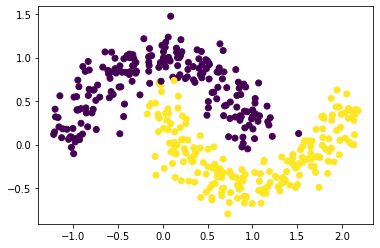

In [ ]:
# plot Features and colour points according to the class, y
for i in range(X_m.shape[1] -1):
  plt.scatter(X_m[:,i], X_m[:, i +1], c=y_m)
plt.plot()

In [ ]:
X_m_train, y_m_train, X_m_val, y_m_val, X_m_test, y_m_test = train_val_test_split(X_m, yt_m)

X_train.shape: (280, 2) X_val.shape: (60, 2) X_test.shape: (60, 2)
y_train.shape: (280, 1) y_val.shape: (60, 1) y_test.shape: (60, 1)


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  [[-2.77608757]
 [-5.3438835 ]]
b =  0.848293864916736
------------------------------------------------------------------------------------
Epoch  5 / 50 ======== Loss =  1.2320628413761194 Accuracy =  60.357142857142854
Epoch  10 / 50 ======== Loss =  1.117036869426939 Accuracy =  61.78571428571429
Epoch  15 / 50 ======== Loss =  1.0129196392725437 Accuracy =  65.0
Epoch  20 / 50 ======== Loss =  0.9195068261303592 Accuracy =  66.42857142857143
Epoch  25 / 50 ======== Loss =  0.836407602546952 Accuracy =  67.14285714285714
Epoch  30 / 50 ======== Loss =  0.763070409071239 Accuracy =  70.35714285714286
Epoch  35 / 50 ======== Loss =  0.6988174418196357 Accuracy =  70.71428571428572
Epoch  40 / 50 ======== Loss =  0.6428828518030889 Accuracy =  71.78571428571429
Epoch  45 / 50 ======== Loss =  0.5944509630119833 Accuracy =  73.21428571428571
Epoch  50 / 50 ====

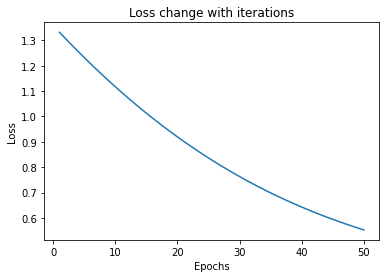

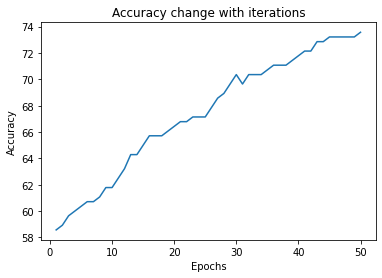

In [ ]:
#Call fit method and get optimised values of W and b
W_m, b_m = fit(X_m_train, y_m_train, epochs = 50, lr = 0.09)

In [ ]:
# Evaluate the model on Validation dataset
evaluate(X_m_val, y_m_val, W_m, b_m)

Loss =  0.47225172942977023 Accuracy =  73.33333333333333 %


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  [[-1.7368876]
 [-0.4591115]]
b =  0.5895338846154045
------------------------------------------------------------------------------------
Epoch  20 / 200 ======== Loss =  0.3827170425844533 Accuracy =  86.78571428571429
Epoch  40 / 200 ======== Loss =  0.3198889181224621 Accuracy =  86.07142857142858
Epoch  60 / 200 ======== Loss =  0.30157698607620026 Accuracy =  86.42857142857143
Epoch  80 / 200 ======== Loss =  0.2920655967601305 Accuracy =  86.78571428571429
Epoch  100 / 200 ======== Loss =  0.28583970265197056 Accuracy =  86.78571428571429
Epoch  120 / 200 ======== Loss =  0.2813332088534215 Accuracy =  86.78571428571429
Epoch  140 / 200 ======== Loss =  0.27790788932937915 Accuracy =  87.14285714285714
Epoch  160 / 200 ======== Loss =  0.2752315990720502 Accuracy =  87.5
Epoch  180 / 200 ======== Loss =  0.2731023212979033 Accuracy =  87.5
Epoch  200 / 

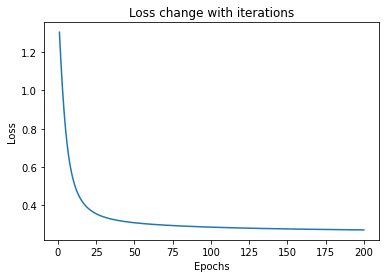

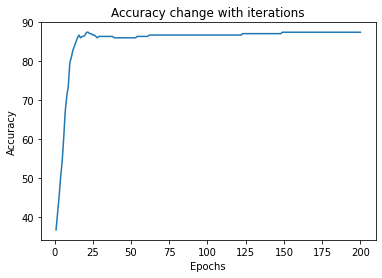

In [ ]:
# Modifying parameters (learning rate and epochs) 
# and training the model again to improve accuracy against validation dataset 
W_m, b_m = fit(X_m_train, y_m_train, epochs = 200, lr = 0.5)

In [ ]:
# Evaluate the model on validation dataset after updates to parameters
evaluate(X_m_val, y_m_val, W_m, b_m)

Loss =  0.3378513204525026 Accuracy =  78.33333333333333 %


In [ ]:
# After finding best parameter, evaluate the model on Test dataset
evaluate(X_m_test, y_m_test, W_m, b_m)

Loss =  0.2632362651983799 Accuracy =  86.66666666666667 %


***Accuracy for Moons400 dataset for Validation dataset after updates to parameters is 95% and 86.6% for testing dataset.***

# 2.2 Data Preparation and implementation on blobs250 dataset

In [ ]:
# Use pandas to read the CSV file as a dataframe
df_blobs = pd.read_csv("/content/blobs250.csv")

# The y values are those labelled 'Class': extract their values
y_b = df_blobs['Class'].values

# The x values are all other columns
del df_blobs['Class']   # drop the 'Class' column from the dataframe
X_b = df_blobs.values     # convert the remaining columns to a numpy array

print('X_b.shape: ', X_b.shape)
print('y_b.shape', y_b.shape)

X_b.shape:  (250, 3)
y_b.shape (250,)


In [ ]:
# Transpose the y data using 'reshape'
yt_b = np.reshape(y_b, (len(y_b),1))
print('yt_b.shape', yt_b.shape)

yt_b.shape (250, 1)


[]

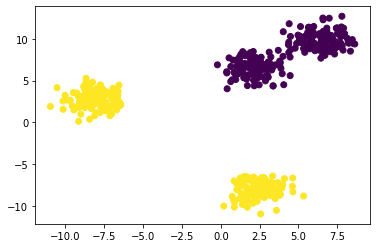

In [ ]:
# plot Features and colour points according to the class, y
for i in range(X_b.shape[1] -1):
  plt.scatter(X_b[:,i], X_b[:, i +1], c=y_b)
plt.plot()

As visible from the graph that the class data is linearly separable

In [ ]:
X_b_train, y_b_train, X_b_val, y_b_val, X_b_test, y_b_test = train_val_test_split(X_b, yt_b)

X_train.shape: (175, 3) X_val.shape: (37, 3) X_test.shape: (38, 3)
y_train.shape: (175, 1) y_val.shape: (37, 1) y_test.shape: (38, 1)


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  [[ 4.22598469]
 [ 1.93825235]
 [-0.83296307]]
b =  0.5625448142143477
------------------------------------------------------------------------------------
Epoch  10 / 100 ======== Loss =  0.311532238061403 Accuracy =  88.0
Epoch  20 / 100 ======== Loss =  0.07817739258974019 Accuracy =  97.14285714285714
Epoch  30 / 100 ======== Loss =  0.03664579798019352 Accuracy =  98.28571428571429
Epoch  40 / 100 ======== Loss =  0.021803108155445398 Accuracy =  99.42857142857143
Epoch  50 / 100 ======== Loss =  0.014876322135813004 Accuracy =  99.42857142857143
Epoch  60 / 100 ======== Loss =  0.011066259808848037 Accuracy =  100.0
Epoch  70 / 100 ======== Loss =  0.008721956708089368 Accuracy =  100.0
Epoch  80 / 100 ======== Loss =  0.00715913466113985 Accuracy =  100.0
Epoch  90 / 100 ======== Loss =  0.006053434490111564 Accuracy =  100.0
Epoch  100 / 100 ======== L

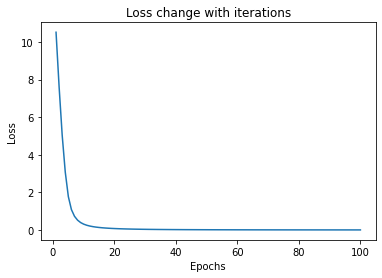

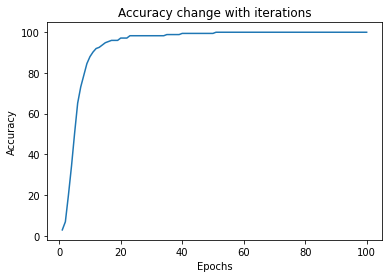

In [ ]:
#Call fit method and get optimised values of W and b
W_b, b_b = fit(X_b_train, y_b_train, epochs = 100, lr = 0.05)

In [ ]:
# Evaluate the model on validation dataset
evaluate(X_b_val, y_b_val, W_b, b_b)

Loss =  0.0030555359301118012 Accuracy =  100.0 %


In [ ]:
# As we got 100% accuracy on validation data set due to linearly separable data, evaluate the model on Test dataset
evaluate(X_b_test, y_b_test, W_b, b_b)

Loss =  0.0024592221417210165 Accuracy =  100.0 %


***Accuracy for Blobs250 dataset for both validation and testing dataset is 100% as it's lineraly separable***

# **Part 3: Implement and Test a Shallow Neural Network**

**Introduction to Neural Network**

Neural Network is multilayer networks of neurons which classify and predict things based on requirement. Forward propagation will be implemented along with sigmoid function to optimize the value for weight and biases. Hidden layer will be included with random values for nodes and sigmoid function will also be used for optimizing the values for weights and biases. Backword propagation has been implemented along with Gradient Descent to minimize error at each neuron in the model to increase the accuracy.

References:

https://towardsdatascience.com/understanding-neural-networks-19020b758230


Followed class notes

**Tasks in implementing a Shallow Neural Network (support 1 Hidden Layer and 1 Output Node)**

*   Update on the Part 1 Logitic Regresion functions to support hidden layer(s)
*   New function (initialize_params) added to return random values of Weights and bias for all layers
*   Update Forward propagation function to accept parameters for multiple layers
*   New function to calculate derivative of sigmoid function
*   Update Optimizer function to perform Backward propagation and optimize values of Weights and Bias for all layers
*   Update fit funtion to support hidden layer(s)
*   Update evaluate function

**Function to initialize parameters (Weights and Bias) for all layers**

In [ ]:
def initialize_params(nodes):
  '''Function to return random values of W and b'''
  W = {}
  b = {}
  for i in range(1, len(nodes)):
    W['W' + str(i)] = 2 * np.random.random((nodes[i-1], nodes[i])) - 1
    b['b' + str(i)] = 2 * np.random.random((1, nodes[i])) - 1
  return W, b

**Function to perform Forward propagation for n number of Hidden layers**

In [ ]:
def forward_prop_snn(X, w, b):
  # n_h - Number of hidden layers
  n_h = len(w) - 1
  a = {}
  z = {}

  for i in range(1, len(w) + 1):
    if (i == 1):
      # z = X.w + b
      z['z' + str(i)] = X.dot(w['W' + str(i)]) + b['b' + str(i)]
      a['a' + str(i)] = sigmoid(z['z' + str(i)])
    else:
      # z = a.w + b , where a = activation function outputs of previous layer
      z['z' + str(i)] = a['a' + str(i-1)].dot(w['W' + str(i)]) + b['b' + str(i)]
      a['a' + str(i)] = sigmoid(z['z' + str(i)])

  return z, a

**Function to calculate derivative of Sigmoid function**

Followed Notes 

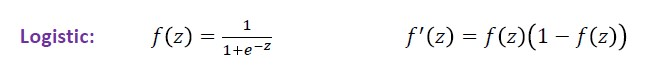

In [ ]:
def sigmoid_derivative(z):
    '''Function to calculate Sigmoid derivative'''
    # 𝑓′(𝑧) = 𝑓(𝑧)(1−𝑓(𝑧))
    return sigmoid(z)*(1 - sigmoid(z))

**Function to perform Backward propagation and optimize Weights and Biases of all layers**

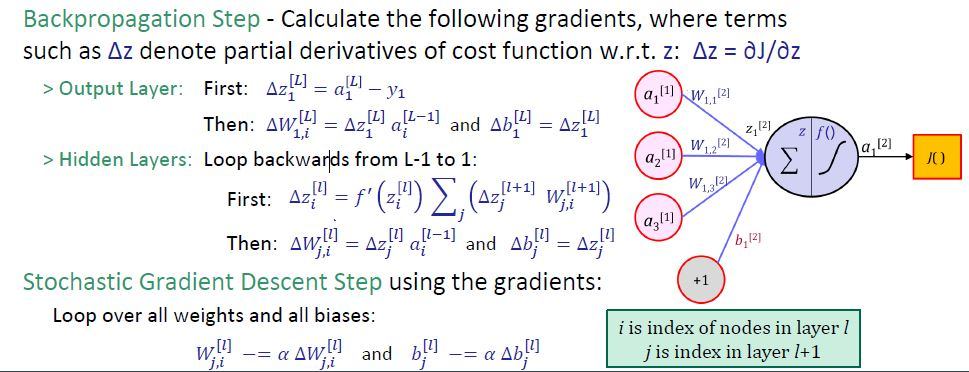

In [ ]:
def optimizer_snn(W, b, X, y, y_pred, lr, a, z):
  '''Gradient descent Function to optimize values of weight and bias'''

  # n_l - Number of layers
  n_l = len(W)
  dW = {}
  db = {}
  dz = {}

  for i in range(n_l, 0, -1):
    if i == n_l:
      # Output Layer
      # Δ𝑧1[𝐿]=𝑎1𝐿−𝑦1
      dz['dz' + str(i)] = y_pred - y
    else:
      # Hidden Layers
      dz['dz' + str(i)] = np.multiply(sigmoid_derivative(z['z' + str(i)]), 
                                      np.dot(dz['dz' + str(i+1)], W['W' + str(i + 1)].T))
      
    if i==1:
      dW['dW' + str(i)] = X.T.dot(dz['dz' + str(i)]) / y.shape[0]
    else:
      dW['dW' + str(i)] = a['a' + str(i - 1)].T.dot(dz['dz' + str(i)]) / y.shape[0]


    db['db' + str(i)] = np.mean(dz['dz' + str(i)], axis=0, keepdims=True)

  # Updating Weights and bias
  for i in range(1, n_l +1):
    # Update weight as 𝑊𝑗,𝑖[𝑙] −= 𝛼Δ𝑊𝑗,𝑖[𝑙]
    W['W' + str(i)] -= lr * dW['dW' + str(i)]

    # Upate bias as 𝑏𝑗[𝑙] −= 𝛼Δ𝑏𝑗[𝑙]
    b['b' + str(i)] -= lr * db['db' + str(i)]
  

  return W, b

**Function to fit a Shallow Neural Network Logistic Regression Model with 1 hidden layer and 1 output node**

In [ ]:
def fit_snn(X, y, nodes, epochs = 100, lr = 0.0005):
  '''Function to fit the inputs'''
  losses = []
  # Initialize and print random values for parameters Weight and Bias
  W, b = initialize_params(nodes)
  print('------------------------------------------------------------------------------------')
  print('Initial values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  accuracy = []
  for i in range(epochs):
    # Forward propagtion - Predict class values 
    z, a = forward_prop_snn(X, W, b)
    
    # Calculate loss using average log loss Cost function
    loss = cost_function(y, a['a' + str(len(W))])
    losses.append(loss)

    # Calculate Accuracy after each epoch
    acc= score(y, a['a' + str(len(W))])
    accuracy.append(acc)

    # Print loss and accuracy 
    if((i + 1) % (epochs/10) == 0):
      print('Epoch ', i+1, '/', epochs, '========', 'Loss = ', loss, 'Accuracy = ', acc)

    # Backward propagation - Optimize updated Weights and Bias using Gradient Descent
    W, b = optimizer_snn(W, b, X, y, a['a' + str(len(W))], lr, a, z)

  print('------------------------------------------------------------------------------------')
  print('After ', epochs, ' iterations, final Optimized values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  #Plot epoch vs loss plot
  ax1 = plot_graph(list(range(1, epochs + 1)), losses, "Loss change with iterations", "Epochs", "Loss")

  #Plot epoch vs accuracy plot
  ax2 = plot_graph(list(range(1, epochs + 1)), accuracy, "Accuracy change with iterations", 
                   "Epochs", "Accuracy")

  del losses[:]

  return W, b

**Function to evaluate the algorithm**

In [ ]:
def evaluate_snn(X, y, W, b):
  '''Function to evaluate algorithm in unknown samples''' 
  # Predict calls using optimized Weight and Bias values
  z, a = forward_prop_snn(X, W, b)

  # Calculate loss
  loss = cost_function(y, a['a' + str(len(W))])

  # Calculate Accuracy
  accuracy = score(y, a['a' + str(len(W))])

  print('Loss = ', loss, 'Accuracy = ', accuracy, '%')

**Testing implementation on the two small datasets**

**Testing on moons400 dataset**

In [ ]:
# Number of Hidden layers = 1
# Nodes format - 
# [no. of input nodes, no. of hidden layer nodes (if multiple hls, separate by commas), output node]
nodes = [X_m_train.shape[1], 5, 1]

------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[ 0.79894165,  0.1331664 , -0.40898227, -0.20564359, -0.69448804],
       [ 0.64719512, -0.2063638 , -0.06052743,  0.07126396, -0.97111315]]), 'W2': array([[-0.97581832],
       [-0.37001767],
       [-0.35370719],
       [ 0.02709685],
       [ 0.63639796]])}
b =  {'b1': array([[ 0.28204674,  0.72670624,  0.28525893, -0.05300415,  0.20464708]]), 'b2': array([[0.12395108]])}
------------------------------------------------------------------------------------
Epoch  5 / 50 ======== Loss =  0.6974386654594259 Accuracy =  48.57142857142857
Epoch  10 / 50 ======== Loss =  0.675190182756604 Accuracy =  65.71428571428571
Epoch  15 / 50 ======== Loss =  0.6545181364597453 Accuracy =  73.92857142857143
Epoch  20 / 50 ======== Loss =  0.6312372105511883 Accuracy =  81.78571428571428
Epoch  25 / 50 ======== Loss =  0.6044739765800815 Accuracy =  86.428571

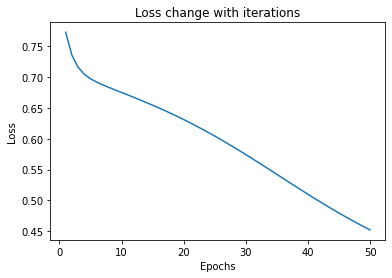

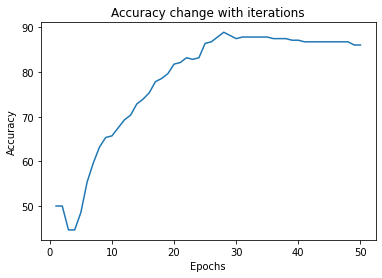

In [ ]:
# Fit training samples for moons400 dataset into updated Logistic Regression model with 1 hidden layer
W_mn, b_mn = fit_snn(X_m_train, y_m_train, nodes, epochs = 50, lr = 0.5)

In [ ]:
# Evaluate the model on validation dataset after updates to parameters
evaluate_snn(X_m_val, y_m_val, W_mn, b_mn)

Loss =  0.4719735830285121 Accuracy =  78.33333333333333 %


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[ 0.46577992, -0.67743642, -0.548871  , -0.55372102,  0.90594593,
        -0.87143109,  0.67241278,  0.75728512,  0.05126208, -0.5232222 ],
       [-0.26799671, -0.46878713,  0.54282887,  0.50819374, -0.81611747,
        -0.96242542, -0.70097593, -0.27353085, -0.19419444,  0.36306832]]), 'W2': array([[-0.4666646 ],
       [-0.8889651 ],
       [ 0.45121462],
       [-0.3818392 ],
       [ 0.72382547],
       [-0.07621748],
       [ 0.73105477],
       [-0.21132752],
       [-0.27469265],
       [ 0.6559871 ]])}
b =  {'b1': array([[ 0.75060832,  0.64546389,  0.17973268,  0.21448725, -0.93661885,
        -0.95109677, -0.01358344, -0.33060487, -0.63657692,  0.98536498]]), 'b2': array([[-0.60842754]])}
------------------------------------------------------------------------------------
Epoch  20 / 200 ======== Loss =  0.4716356969098081 Accuracy =  

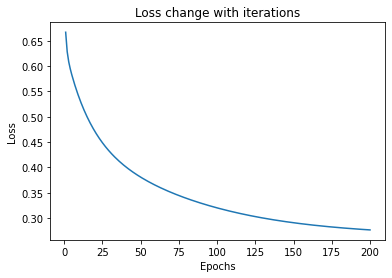

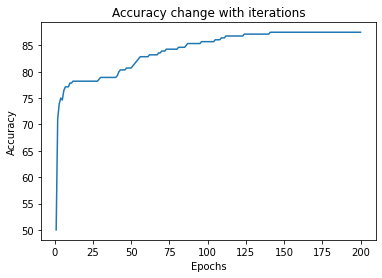

In [ ]:
# Adding more nodoes to Hidden layer and updating parameters so as to increase accuracy of Valiation set
nodes = [X_m_train.shape[1], 10, 1]
W_mn, b_mn = fit_snn(X_m_train, y_m_train, nodes, epochs = 200, lr = 0.5)

In [ ]:
# Evaluate model on validation dataset after updates to parameters
evaluate_snn(X_m_val, y_m_val, W_mn, b_mn)

Loss =  0.3515946814946256 Accuracy =  78.33333333333333 %


In [ ]:
# Evaluate the model on test dataset
evaluate_snn(X_m_test, y_m_test, W_mn, b_mn)

Loss =  0.26593774415937627 Accuracy =  88.33333333333333 %


**As we can see, the accuracy of model with 1 hidden layer for the moons400 data set is higher than the implementation of Logistic Regression with no hidden layers in part 1**




-----



**Testing on blobs250 dataset**

In [ ]:
# Number of Hidden layers = 1
# Nodes format - [(no. of input nodes), (no. of hidden layer nodes), (output node)]
nodes = [X_b_train.shape[1], 5, 1]

------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[-0.30126402, -0.62428282,  0.62722771,  0.20768977, -0.01840423],
       [ 0.27116143,  0.20527819,  0.24926944, -0.82662014,  0.14295043],
       [-0.36848471,  0.84873139, -0.18486187, -0.52465107, -0.40353668]]), 'W2': array([[-0.68701524],
       [ 0.36418734],
       [-0.23592572],
       [ 0.98859057],
       [-0.43870144]])}
b =  {'b1': array([[ 0.8128974 , -0.1707305 , -0.91700435, -0.19724534, -0.74264087]]), 'b2': array([[0.18888404]])}
------------------------------------------------------------------------------------
Epoch  10 / 100 ======== Loss =  0.18114264427282867 Accuracy =  100.0
Epoch  20 / 100 ======== Loss =  0.10186731877051061 Accuracy =  100.0
Epoch  30 / 100 ======== Loss =  0.07049130454906902 Accuracy =  100.0
Epoch  40 / 100 ======== Loss =  0.05398231334077185 Accuracy =  100.0
Epoch  50 / 100 ======== Loss =  0.0

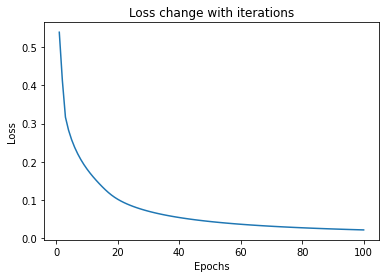

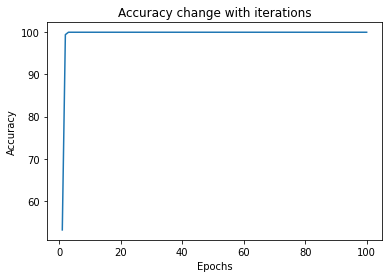

In [ ]:
# Fit the training samples for blobs250 dataset into updated Logistic Regression model with 1 hidden layer
W_bn, b_bn = fit_snn(X_b_train, y_b_train, nodes, epochs = 100, lr = 0.5)

In [ ]:
# Evaluate the model on validation dataset after updates to parameters
evaluate_snn(X_b_val, y_b_val, W_bn, b_bn)

Loss =  0.019957625512169883 Accuracy =  100.0 %


In [ ]:
# No need to update the parameters as accuracy on Validation dataset is 100%
evaluate_snn(X_b_test, y_b_test, W_bn, b_bn)

Loss =  0.02033762503413316 Accuracy =  100.0 %


The accuracy remained 100% for the linearly separable blobs250 dataset with the addition of 1 hiddel layer to the neural network

------------

# **Part 4: Challenging Task**

Tasks -


*   Use the CIFAR 10 dataset
https://www.cs.toronto.edu/~kriz/cifar.html

*   Each image is 32x32, 3 colour channels (RGB):
Use just 1 colour or convert to greyscale;
Convert to vector of 1024 floats

*   50k training images, 10k testing images: you
can select random subsets ( e.g. 1 batch)

*   1 hidden layer (larger than first case), 1 output

*   Distinguish between 2 classes - Frog and Aeroplane




*Loaded datasets using notes provided*




**Using functions provided to load and work with CIFAR10 dataset**

In [ ]:
# This function taken from the CIFAR website
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
  return dict

  
# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, 
#           and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are 
#           the red channel values of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.

In [ ]:
def loadbatch(batchname):
  '''Function to load batch data from the file'''
  folder = '/content'
  batch = unpickle(folder+"/"+batchname)
  return batch

In [ ]:
def loadlabelnames():
  '''Function to load label names from the meta file'''
  folder = '/content'
  meta = unpickle(folder+"/"+'batches.meta')
  return meta[b'label_names']

In [ ]:
def visualise(data, index):
  '''Function to plot images using data'''
  picture = data[index]
  # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
  # Note: after reshaping like this, you could select one colour channel or average them.
  picture.shape = (3,32,32) 
  
  # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
  picture = picture.transpose([1, 2, 0])
  plt.imshow(picture)
  plt.show()

**Function to convert RGB colour channels to Gray scale**

References:
https://en.wikipedia.org/wiki/Grayscale

In [ ]:
def convert_rgb_to_grayscale(rgb_picture):
  '''Function to convert RGB colour channels to Gray scale'''
  # Y'= 0.299R'+0.587G'+ 0.114B' (https://en.wikipedia.org/wiki/Grayscale)
  return np.dot(rgb_picture[...,:3], [0.299, 0.587, 0.114])

**Function to take batch name as input and return X(features) and y (labels) values**

In [ ]:
def prepare_data_for_batch(batchname):
  '''Function to take batch name as input and return X(features) and y (labels) values'''

  batch1 = loadbatch(batchname)
  print("Number of items in the batch is", len(batch1))

  # Display all keys, so we can see the ones we want
  print('All keys in the batch:', batch1.keys())

  data = batch1[b'data']
  labels = batch1[b'labels']
  print ("Size of data in this batch:", len(data), ", size of labels:", len(labels))
  print (type(data))
  print(data.shape)

  names = loadlabelnames()

  # Display a few images from the batch for required classes
  #for i in [0, 22, 5391, 5719]:
    #visualise(data, i)
    #print("Image", i,": Class is ", names[labels[i]])


  # 2 classes to distinguish between are Frog and Airplane
  classes = [b'frog', b'airplane']


  # Get label values for names matching classes
  label_values = []
  for i in range(len(names)):
    if names[i] in classes:
      label_values.append(i)
  
  # Get indexes from label where values match label values calculated above
  class_idx = [idx for idx, element in enumerate(labels) if element in label_values]

  features = []
  lbls = []

  for i in class_idx:
    picture = data[i]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    picture.shape = (3,32,32)
    picture = picture.transpose([1, 2, 0])

    # Converting to Gray scale
    gray = convert_rgb_to_grayscale(picture)

    # Convert to vector of 1024 floats
    gray.shape = 1024

    features.append(gray)

    lbls.append(labels[i])

  X = np.array(features)
  y = np.array(lbls)

  print('X.shape: ', X.shape)
  print('y.shape', y.shape)

  # Transpose the y data using 'reshape'
  yt = np.reshape(y, (len(y),1))
  print('yt.shape', yt.shape)


  # Data Normalization

  # Converting values between 0 and 1
  X = X.astype('float32') / 255

  # Convert yt to a 0 or 1 array
  label_values = []
  for i in range(len(names)):
    if names[i] in classes:
      label_values.append(i)

  for i in range(len(yt)):
    if yt[i] == label_values[0]:  yt[i] = [0]
    else:  yt[i] = [1]


  return X, yt

In [ ]:
# Plot Features and colour points according to the class, y
#for i in range(X.shape[1] -1):
  #plt.scatter(X[:,i], X[:, i +1], c=y)
#plt.plot()


**Prepare Train data**

In [ ]:
# Selecting batch 1 for training data set
X_cf_train, y_cf_train = prepare_data_for_batch('data_batch_1')

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)
X.shape:  (2035, 1024)
y.shape (2035,)
yt.shape (2035, 1)


**Prepare Validation and Test data**

In [ ]:
# Prepare test and Validation values
X_t, y_t = prepare_data_for_batch('test_batch')

# Split test data into 70/30 for test and validation respc
X_cf_val, X_cf_test, y_cf_val, y_cf_test = train_test_split(X_t, y_t, test_size= 0.7)

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)
X.shape:  (2000, 1024)
y.shape (2000,)
yt.shape (2000, 1)


**Train the model on CIFAR10 Training dataset**

------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[-0.94751741, -0.4940329 , -0.68496023, ...,  0.30851226,
        -0.55529461,  0.77958884],
       [ 0.80414984, -0.21006136,  0.95934459, ..., -0.22689743,
         0.27324532,  0.57589321],
       [ 0.91050099,  0.12356304, -0.04238841, ..., -0.22118465,
        -0.82856069, -0.03844283],
       ...,
       [-0.52843273, -0.38138068, -0.13873015, ..., -0.02849932,
        -0.32138044,  0.83246029],
       [ 0.46974196,  0.05867166,  0.74895248, ...,  0.45136791,
        -0.35238944, -0.12922989],
       [-0.89364781,  0.88833958,  0.74071424, ..., -0.03983381,
         0.0348181 ,  0.2517547 ]]), 'W2': array([[-0.01314796],
       [ 0.55144969],
       [ 0.97500975],
       [-0.4781681 ],
       [-0.9232811 ],
       [ 0.13694854],
       [ 0.67654012],
       [ 0.22359743],
       [-0.40470568],
       [ 0.74763127]])}
b =  {'b1': array([[-0

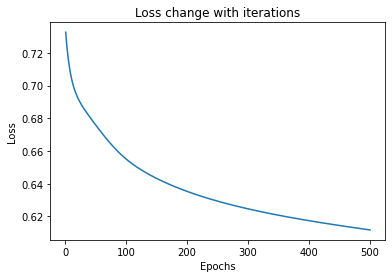

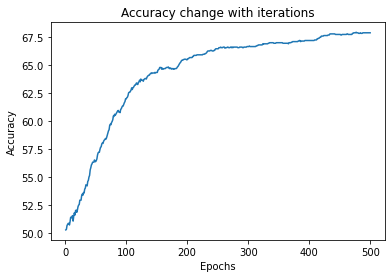

In [ ]:
# Call fit method and get optimised values of W and b
nodes = [X_cf_train.shape[1], 10, 1]
W_cf, b_cf = fit_snn(X_cf_train, y_cf_train, nodes, epochs = 500, lr = 0.05)

**Optimize the parameters using evaluation of Validation dataset and evaluate on CIFAR10 Test dataset**

In [ ]:
# Evaluate the model on validation dataset
evaluate_snn(X_cf_val, y_cf_val, W_cf, b_cf)

Loss =  0.625139552811212 Accuracy =  65.66666666666666 %


------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[ 0.99183253, -0.75443616,  0.33511955, ...,  0.94123656,
        -0.37265934,  0.96366752],
       [-0.19303472,  0.54742625, -0.25084837, ..., -0.82018819,
         0.90642734, -0.41251495],
       [-0.59867549, -0.85361221,  0.14335537, ...,  0.36113598,
        -0.33835764, -0.51962432],
       ...,
       [-0.0140552 , -0.77759457, -0.99575563, ..., -0.32248397,
        -0.11219039,  0.31720234],
       [ 0.69378809, -0.53682459, -0.37592369, ..., -0.06170411,
        -0.43712677, -0.65077234],
       [-0.2427272 , -0.94724862, -0.74860062, ...,  0.04513396,
        -0.37514902,  0.0209441 ]]), 'W2': array([[ 0.63433403],
       [-0.14335919],
       [-0.03475389],
       [-0.4540359 ],
       [ 0.56081714],
       [ 0.73295043],
       [ 0.16613045],
       [ 0.20134028],
       [-0.09053435],
       [ 0.62471228],
       [-0.52868275],
  

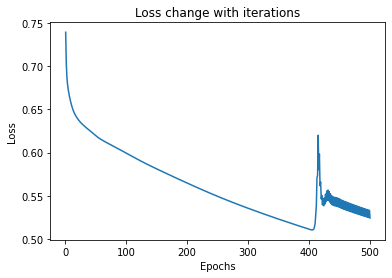

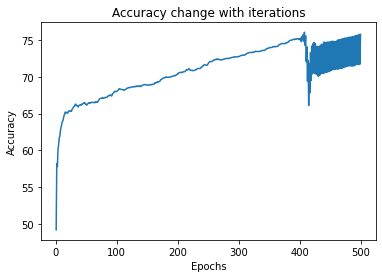

In [ ]:
#Call fit method and get optimised values of W and b
nodes = [X_cf_train.shape[1], 20, 1]
W_cf, b_cf = fit_snn(X_cf_train, y_cf_train, nodes, epochs = 500, lr = 0.5)

In [ ]:
# Evaluate the model on validation dataset after updates to parameters
evaluate_snn(X_cf_val, y_cf_val, W_cf, b_cf)

Loss =  0.6194937859716128 Accuracy =  67.5 %


In [ ]:
# After getting optimised values of weights and bias, evaluate model on Test data set
evaluate_snn(X_cf_test, y_cf_test, W_cf, b_cf)

Loss =  0.5592222602156122 Accuracy =  71.85714285714285 %


#Part 5: Deep Learning Enhancements

---



**Mini Batch Gradient descent**

Mini Batch Gradient Descent as its name suggest divides training dataset into small batches which is further used for computing error in the model. Batch gradient descent computes error in model by evaluating training dataset. it updates model once it evaluates entire training dataset. Updating model after evaluating entire training dataset add additional complexity and lower down the speed in training the model. However, one can attain both robustness and efficiency with the implementation of mini batch gradient descent in the model. 



References:

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

https://www.youtube.com/watch?v=4qJaSmvhxi8

**Tasks:**

*   Applying Mini Batch Gradient Descent in Part 3 Shallow Neural Network 
*   Increasing the number of  hidden layers
*   Testing the algorithm on the Part 4 image dataset

In [ ]:
def fit_mini_batch(X, y, nodes, batch_size, epochs = 100, lr = 0.0005):
  '''Function to fit the inputs'''
  losses = []
  # Initialize and print random values for parameters Weight and Bias
  W, b = initialize_params(nodes)
  print('------------------------------------------------------------------------------------')
  print('Initial values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  no_of_batches = math.ceil(y.shape[0]/batch_size)
  print("No. of batches in each iteration = ", no_of_batches)

  accuracy = []

  for i in range(epochs):

    k = 0

    # Randomly shuffle X and y values before splitting into mini batches
    X_r, y_r = shuffle(X, y)

    mini_batch_loss = []
    mini_batch_acc = []
    # Creating mini batches of batch size provided
    for j in range(0, y.shape[0], batch_size):

      
      k += 1
      # Splitting X and y in mini batches of mentioned batch size
      X_i = X_r[j:j+batch_size,:]
      y_i = y_r[j:j+batch_size,:]


      # Forward propagtion - Predict class values for mini batch 
      z, a = forward_prop_snn(X_i, W, b)
      
      # Calculate loss using average log loss Cost function for mini batch
      mini_batch_loss.append(cost_function(y_i, a['a' + str(len(W))]))

      # Calculate Accuracy after each epoch for mini batch
      mini_batch_acc.append(score(y_i, a['a' + str(len(W))]))

      # Backward propagation - Optimize updated Weights and Bias using Gradient Descent for mini batch
      W, b = optimizer_snn(W, b, X_i, y_i, a['a' + str(len(W))], lr, a, z)

    itr_loss = np.mean(mini_batch_loss)
    losses.append(itr_loss)
    itr_acc = np.mean(mini_batch_acc)
    accuracy.append(np.mean(itr_acc))

    # Print average loss and accuracy of all the mini batches for each iteration
    if((i + 1) % (epochs/10) == 0):
      print('Average loss and accuracy of all the mini batches for epoch ', i+1, '/', epochs)
      print('========', 'Loss = ', itr_loss, 'Accuracy = ', itr_acc)
  

  print('------------------------------------------------------------------------------------')
  print('After ', epochs, ' iterations, final Optimized values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  
  # Plot No of iterations vs Average loss of mini batches plot
  ax1 = plot_graph(list(range(1, len(losses) + 1)), losses, "Average Loss change with iterations", 
                   "Epochs", "Loss")

  # Plot No of iteration vs Average accuracy of mini batches plot
  ax2 = plot_graph(list(range(1, len(accuracy) + 1)), accuracy, "Accuracy change with iterations", 
                   "Epochs", "Accuracy")

  del losses[:]

  return W, b

------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[-0.85058206,  0.12123664, -0.14184103, ...,  0.15474347,
        -0.42099756,  0.37309838],
       [ 0.261456  , -0.57275358, -0.37295327, ...,  0.87305256,
        -0.14757292,  0.11421738],
       [ 0.87870249,  0.30928016, -0.57646508, ...,  0.98613156,
         0.21176985, -0.32509942],
       ...,
       [ 0.93044223, -0.05027386,  0.4563429 , ..., -0.46207138,
        -0.39917881,  0.19071487],
       [-0.46299955, -0.02633388, -0.49330562, ..., -0.31351172,
        -0.35528195, -0.40391232],
       [-0.48966944, -0.82656591, -0.90315564, ...,  0.25882768,
        -0.25886949, -0.29470573]]), 'W2': array([[-0.7212649 , -0.97673927, -0.03273308, -0.83030096, -0.24296838],
       [-0.48592951, -0.11362261,  0.9173631 ,  0.99201042, -0.35366508],
       [ 0.34786169, -0.52657813,  0.09611875,  0.4206671 ,  0.06538209],
       [-0.75167051, -

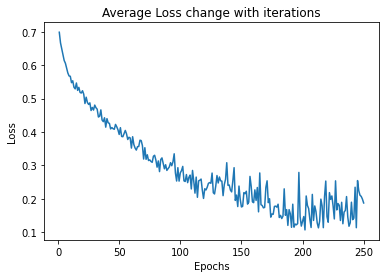

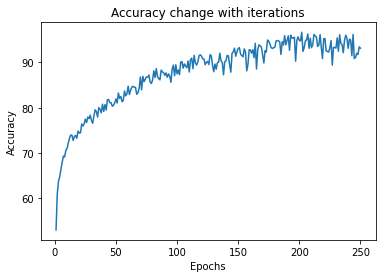

In [ ]:
#Call fit method and get optimised values of W and b
# Adding additional hidden layer of node size 5
nodes = [X_cf_train.shape[1], 20, 5, 1]

# A good default for batch size is 32
W_cf_mini, b_cf_mini = fit_mini_batch(X_cf_train, y_cf_train, nodes, batch_size = 32, epochs = 250, lr = 0.5)

**Evaluating above algorithm against Validation dataset created**

In [ ]:
evaluate_snn(X_cf_val, y_cf_val, W_cf_mini, b_cf_mini)

Loss =  0.7163705564132256 Accuracy =  77.5 %


**Evaluating above algorithm against Test dataset created**

In [ ]:
evaluate_snn(X_cf_test, y_cf_test, W_cf_mini, b_cf_mini)

Loss =  0.6940970239101419 Accuracy =  77.78571428571428 %


***Accuracy on testing dataset using Mini-Batch Gradient Descent is 77.7%***

**Conclusion**

As we can see, enhancing the shallow neural network algorith to use mini batch gradient descent and increasing the number of hidden layers has increased the accuracy while evaluating against Test dataset

# **Part 5: Deep Learning Enhancements**

**ReLU function**

Sigmoid function takes any real value but provide output in the form of 0 and 1. It is an easy, differentiable, and non-linear activation function. However, it saturates and slow down the process for network model. This slowness issue can easily be removed by ReLU activation function. It resolves vanishing gradient problem and involves easy mathematical calculations. It can only be used within hidden layer for the neural network, and this is what we are going to do here in our shallow neural network for increasing the performance of our neural network. 
Reference: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html


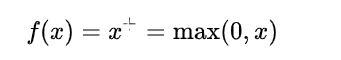

Reference: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)


In [ ]:
def relu(z):
  '''Function to calculate ReLU function'''

  return np.maximum(0, z)

In [ ]:
def relu_derivative(z):
  '''Function to calculate derivative of ReLU function'''
  z[z<=0] = 0
  z[z>0] = 1
  
  return z

In [ ]:
def forward_prop_rs(X, w, b):
  '''Function to perform forward propagation using ReLU function for input to all hideen layers and
     Sigmoid function for last hideen layer to output layer'''
  # n_h - Number of hidden layers
  n_h = len(w) - 1
  a = {}
  z = {}

  for i in range(1, len(w) + 1):
    if (i == 1):
      # z = X.w + b
      z['z' + str(i)] = X.dot(w['W' + str(i)]) + b['b' + str(i)]
      a['a' + str(i)] = relu(z['z' + str(i)])
    elif (i == len(w)):
      # z = a.w + b , where a = activation function outputs of previous layer
      z['z' + str(i)] = a['a' + str(i-1)].dot(w['W' + str(i)]) + b['b' + str(i)]
      a['a' + str(i)] = sigmoid(z['z' + str(i)])
    else:
      # z = a.w + b , where a = activation function outputs of previous layer
      z['z' + str(i)] = a['a' + str(i-1)].dot(w['W' + str(i)]) + b['b' + str(i)]
      a['a' + str(i)] = relu(z['z' + str(i)])
  return z, a

In [ ]:
def optimizer_rs(W, b, X, y, y_pred, lr, a, z):
  '''Gradient descent Function to optimize values of weight and bias'''

  # n_l - Number of layers
  n_l = len(W)
  dW = {}
  db = {}
  dz = {}

  for i in range(n_l, 0, -1):
    if i == n_l:
      # Output Layer
      # Δ𝑧1[𝐿]=𝑎1𝐿−𝑦1
      dz['dz' + str(i)] = y_pred - y

    else:
      # Hidden Layers
      dz['dz' + str(i)] = np.multiply(relu_derivative(z['z' + str(i)]), 
                                      np.dot(dz['dz' + str(i+1)], W['W' + str(i + 1)].T))
      
    if i==1:
      dW['dW' + str(i)] = X.T.dot(dz['dz' + str(i)]) / y.shape[0]
    else:
      dW['dW' + str(i)] = a['a' + str(i - 1)].T.dot(dz['dz' + str(i)]) / y.shape[0]


    db['db' + str(i)] = np.mean(dz['dz' + str(i)], axis=0, keepdims=True)

  # Updating Weights and bias
  for i in range(1, n_l +1):
    # Update weight as 𝑊𝑗,𝑖[𝑙] −= 𝛼Δ𝑊𝑗,𝑖[𝑙]
    W['W' + str(i)] -= lr * dW['dW' + str(i)]

    # Upate bias as 𝑏𝑗[𝑙] −= 𝛼Δ𝑏𝑗[𝑙]
    b['b' + str(i)] -= lr * db['db' + str(i)]
  

  return W, b

In [ ]:
def fit_rs(X, y, nodes, epochs = 100, lr = 0.0005):
  '''Function to fit the inputs'''
  losses = []
  # Initialize and print random values for parameters Weight and Bias
  W, b = initialize_params(nodes)
  print('------------------------------------------------------------------------------------')
  print('Initial values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  accuracy = []
  for i in range(epochs):
    # Forward propagtion - Predict class values 
    z, a = forward_prop_rs(X, W, b)
    
    # Calculate loss using average log loss Cost function
    loss = cost_function(y, a['a' + str(len(W))])
    losses.append(loss)

    # Calculate Accuracy after each epoch
    acc= score(y, a['a' + str(len(W))])
    accuracy.append(acc)

    # Print loss and accuracy 
    if((i + 1) % (epochs/10) == 0):
      print('Epoch ', i+1, '/', epochs, '========', 'Loss = ', loss, 'Accuracy = ', acc)

    # Backward propagation - Optimize updated Weights and Bias using Gradient Descent
    W, b = optimizer_rs(W, b, X, y, a['a' + str(len(W))], lr, a, z)

  print('------------------------------------------------------------------------------------')
  print('After ', epochs, ' iterations, final Optimized values of Weight and Bias are:')
  print('W = ', W)
  print('b = ', b)
  print('------------------------------------------------------------------------------------')

  #Plot epoch vs loss plot
  ax1 = plot_graph(list(range(1, epochs + 1)), losses, "Loss change with iterations", "Epochs", "Loss")

  #Plot epoch vs accuracy plot
  ax2 = plot_graph(list(range(1, epochs + 1)), accuracy, "Accuracy change with iterations", 
                   "Epochs", "Accuracy")

  del losses[:]

  return W, b

In [ ]:
def evaluate_rs(X, y, W, b):
  '''Function to evaluate algorithm in unknown samples''' 
  # Predict calls using optimized Weight and Bias values
  z, a = forward_prop_rs(X, W, b)

  # Calculate loss
  loss = cost_function(y, a['a' + str(len(W))])

  # Calculate Accuracy
  accuracy = score(y, a['a' + str(len(W))])

  print('Loss = ', loss, 'Accuracy = ', accuracy, '%')

------------------------------------------------------------------------------------
Initial values of Weight and Bias are:
W =  {'W1': array([[ 0.09677229, -0.81047239,  0.10218229, ..., -0.26695411,
        -0.02680753,  0.65956096],
       [ 0.16982806, -0.43749131,  0.40604166, ...,  0.05870762,
        -0.69150774, -0.59066949],
       [ 0.61046465,  0.37949467,  0.27631711, ...,  0.3349159 ,
         0.80222068, -0.04132218],
       ...,
       [ 0.03088439,  0.72010933,  0.78974239, ..., -0.98736708,
         0.63650922, -0.3017769 ],
       [ 0.79481935, -0.76994796, -0.64830034, ...,  0.16961855,
         0.10988834, -0.80356736],
       [-0.31457411,  0.78650185, -0.34436928, ...,  0.39586399,
         0.36157593,  0.71463273]]), 'W2': array([[ 0.72381655, -0.52444551,  0.60740174,  0.04406739,  0.39413759],
       [ 0.02188351,  0.2503631 ,  0.57524346, -0.28215466, -0.69261199],
       [ 0.87799366, -0.86697492, -0.98569751, -0.15384894,  0.22523296],
       [ 0.67659553, -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Epoch  50 / 500 ======== Loss =  0.6442071444602024 Accuracy =  62.35872235872236
Epoch  100 / 500 ======== Loss =  0.6198150715024524 Accuracy =  66.53562653562653
Epoch  150 / 500 ======== Loss =  0.6139387752089419 Accuracy =  67.91154791154791
Epoch  200 / 500 ======== Loss =  0.5969306962776965 Accuracy =  68.84520884520884
Epoch  250 / 500 ======== Loss =  0.5969837565407048 Accuracy =  68.992628992629
Epoch  300 / 500 ======== Loss =  0.653687757053654 Accuracy =  64.17690417690419
Epoch  350 / 500 ======== Loss =  0.5947183033506499 Accuracy =  69.92628992628993
Epoch  400 / 500 ======== Loss =  0.5817483821621539 Accuracy =  70.8108108108108
Epoch  450 / 500 ======== Loss =  0.5785623738676118 Accuracy =  70.71253071253071
Epoch  500 / 500 ======== Loss =  0.5798074786706467 Accuracy =  70.95823095823096
------------------------------------------------------------------------------------
After  500  iterations, final Optimized values of Weight and Bias are:
W =  {'W1': array([

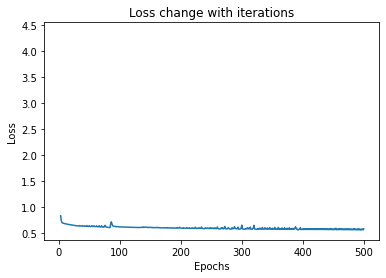

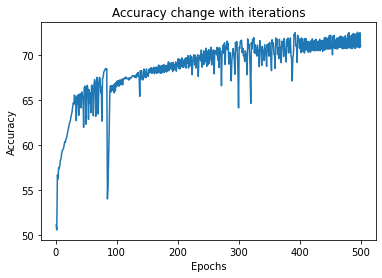

In [ ]:
# Call fit method and get optimised values of W and b
# Adding additional hidden layer of node size 5
nodes = [X_cf_train.shape[1], 20, 5, 1]

W_cf_rs, b_cf_rs = fit_rs(X_cf_train, y_cf_train, nodes, epochs = 500, lr = 0.5)

In [ ]:
evaluate_rs(X_cf_val, y_cf_val, W_cf_rs, b_cf_rs)

Loss =  0.6417052117898042 Accuracy =  69.33333333333334 %


In [ ]:
evaluate_rs(X_cf_test, y_cf_test, W_cf_rs, b_cf_rs)

Loss =  0.6361556419673422 Accuracy =  70.57142857142857 %


***Accuracy for testing dataset is 70.57% after ReLU on hidden layer and sigmoid on outer layer***